In [23]:
#Observable Trend 1 Temperature decreases as you move away from the equator, mostly in the Northern Hemisphere.
#Observable Trend 2 Humidity is high at the equator but is more random as you move away from the equator.
#Observable Trend 3 There does not appear to be an observable trend in wind speed and cloudiness as you move away from the equator. However, the highest wind speeds are observed in the Southern Hemisphere

In [2]:
import json
import requests 
import random
import numpy as np
from pprint import pprint
from config import api_key

import matplotlib.pyplot as plt
import pandas as pd

import openweathermapy.core as owm
from citipy import citipy

In [3]:
iterator = 1
total_cities = 600

city_name_list = []
country_code_list = []

while iterator <= total_cities:

    lat = random.uniform(-75, 75)
    lon = random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lon)
    country_code = city.country_code
    name = city.city_name
    city_name_list.append(name)
    country_code_list.append(country_code)
    
    iterator += 1
    

In [4]:
city_dict = {"City": city_name_list,
            "Country": country_code_list}
city_pd = pd.DataFrame(city_dict)
city_pd["Latitude"] = ""
city_pd["Longitude"] = ""
city_pd["Temperature"] = ""
city_pd["Humidity"] = ""
city_pd["Wind Speed"] = ""
city_pd["Cloudiness"] = ""
city_pd.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,lata,sb,,,,,,
1,saint george,bm,,,,,,
2,puerto leguizamo,co,,,,,,
3,poum,nc,,,,,,
4,nome,us,,,,,,


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

count = 1

# Loop through cities_pd, lat/long search for each city
for index, row in city_pd.iterrows():

    city = row['City']
    country = row['Country']
    
    weather_response = requests.get(query_url + city + "," + country)
    weather_json = weather_response.json()
    
    print(f"Requesting current weather data for city #{count} {city}, {country}  ")
    print("URL: "+ weather_response.url)
    print()
    
    try:
        city_pd.at[index, "Latitude"] = weather_json['coord']['lat']
        city_pd.at[index, "Longitude"] = weather_json['coord']['lon']
        city_pd.at[index, "Temperature"] = weather_json['main']['temp']
        city_pd.at[index, "Humidity"] = weather_json['main']['humidity']
        city_pd.at[index, "Wind Speed"] = weather_json['wind']['speed']
        city_pd.at[index, "Cloudiness"] = weather_json['clouds']['all']
    
    except (KeyError):
        print("Missing field/result... skipping.")
        print()
        
    count += 1
    

Requesting current weather data for city #1 lata, sb  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=lata,sb

Missing field/result... skipping.

Requesting current weather data for city #2 saint george, bm  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=saint%20george,bm

Requesting current weather data for city #3 puerto leguizamo, co  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=puerto%20leguizamo,co

Requesting current weather data for city #4 poum, nc  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=poum,nc

Requesting current weather data for city #5 nome, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=nome,us

Requesting current weather data for city #6 kavieng, pg  
URL

Requesting current weather data for city #45 vila velha, br  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=vila%20velha,br

Requesting current weather data for city #46 palabuhanratu, id  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=palabuhanratu,id

Missing field/result... skipping.

Requesting current weather data for city #47 mount isa, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=mount%20isa,au

Requesting current weather data for city #48 rikitea, pf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=rikitea,pf

Requesting current weather data for city #49 sibolga, id  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=sibolga,id

Requesting current weather data for city #50

Requesting current weather data for city #89 rikitea, pf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=rikitea,pf

Requesting current weather data for city #90 tasiilaq, gl  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=tasiilaq,gl

Requesting current weather data for city #91 mataura, pf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=mataura,pf

Missing field/result... skipping.

Requesting current weather data for city #92 hermanus, za  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=hermanus,za

Requesting current weather data for city #93 saldanha, za  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=saldanha,za

Requesting current weather data for city #94 atuona, pf  
URL: h

Requesting current weather data for city #134 belyy yar, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=belyy%20yar,ru

Requesting current weather data for city #135 rikitea, pf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=rikitea,pf

Requesting current weather data for city #136 kapaa, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=kapaa,us

Requesting current weather data for city #137 hilo, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=hilo,us

Requesting current weather data for city #138 kolyvan, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=kolyvan,ru

Requesting current weather data for city #139 bluff, nz  
URL: http://api.openweathermap.org/data/2.5/we

Requesting current weather data for city #179 hastings, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=hastings,us

Requesting current weather data for city #180 plettenberg bay, za  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=plettenberg%20bay,za

Requesting current weather data for city #181 saint-francois, gp  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=saint-francois,gp

Requesting current weather data for city #182 bengkulu, id  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=bengkulu,id

Missing field/result... skipping.

Requesting current weather data for city #183 kiama, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=kiama,au

Requesting current weather data f

Requesting current weather data for city #225 meadow lake, ca  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=meadow%20lake,ca

Requesting current weather data for city #226 chuy, uy  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=chuy,uy

Requesting current weather data for city #227 karamea, nz  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=karamea,nz

Missing field/result... skipping.

Requesting current weather data for city #228 aldan, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=aldan,ru

Requesting current weather data for city #229 novy hrozenkov, cz  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=novy%20hrozenkov,cz

Requesting current weather data for city #230 yar

Requesting current weather data for city #272 fairbanks, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=fairbanks,us

Requesting current weather data for city #273 sao joao da barra, br  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=sao%20joao%20da%20barra,br

Requesting current weather data for city #274 rawannawi, ki  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=rawannawi,ki

Missing field/result... skipping.

Requesting current weather data for city #275 taunggyi, mm  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=taunggyi,mm

Requesting current weather data for city #276 sakaiminato, jp  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=sakaiminato,jp

Requesting current we

Requesting current weather data for city #316 margate, za  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=margate,za

Requesting current weather data for city #317 kapaa, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=kapaa,us

Requesting current weather data for city #318 ushuaia, ar  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=ushuaia,ar

Requesting current weather data for city #319 nome, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=nome,us

Requesting current weather data for city #320 tuatapere, nz  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=tuatapere,nz

Requesting current weather data for city #321 krasnoye, ru  
URL: http://api.openweathermap.org/data/2.5/w

Requesting current weather data for city #362 bagdarin, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=bagdarin,ru

Requesting current weather data for city #363 conde, br  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=conde,br

Requesting current weather data for city #364 libertador general san martin, ar  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=libertador%20general%20san%20martin,ar

Requesting current weather data for city #365 quarai, br  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=quarai,br

Requesting current weather data for city #366 noumea, nc  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=noumea,nc

Requesting current weather data for city #367 requena, p

Requesting current weather data for city #408 qaqortoq, gl  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=qaqortoq,gl

Requesting current weather data for city #409 hithadhoo, mv  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=hithadhoo,mv

Requesting current weather data for city #410 ushuaia, ar  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=ushuaia,ar

Requesting current weather data for city #411 tukrah, ly  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=tukrah,ly

Missing field/result... skipping.

Requesting current weather data for city #412 somerset, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=somerset,us

Requesting current weather data for city #413 provideniya, 

Requesting current weather data for city #452 butaritari, ki  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=butaritari,ki

Requesting current weather data for city #453 albany, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=albany,au

Requesting current weather data for city #454 yulara, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=yulara,au

Requesting current weather data for city #455 ribeira grande, pt  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=ribeira%20grande,pt

Requesting current weather data for city #456 margate, za  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=margate,za

Requesting current weather data for city #457 sataua, ws  
URL: http://api.openwea

Requesting current weather data for city #496 puerto ayora, ec  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=puerto%20ayora,ec

Requesting current weather data for city #497 pitea, se  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=pitea,se

Requesting current weather data for city #498 rikitea, pf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=rikitea,pf

Requesting current weather data for city #499 taolanaro, mg  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=taolanaro,mg

Missing field/result... skipping.

Requesting current weather data for city #500 tigre, pa  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=tigre,pa

Missing field/result... skipping.

Requesting current wea

Requesting current weather data for city #542 jamestown, sh  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=jamestown,sh

Requesting current weather data for city #543 hofn, is  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=hofn,is

Requesting current weather data for city #544 albany, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=albany,au

Requesting current weather data for city #545 oyama, jp  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=oyama,jp

Requesting current weather data for city #546 rikitea, pf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=rikitea,pf

Requesting current weather data for city #547 arraial do cabo, br  
URL: http://api.openweathermap.org/data/

Requesting current weather data for city #585 ulaangom, mn  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=ulaangom,mn

Requesting current weather data for city #586 portsmouth, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=portsmouth,us

Requesting current weather data for city #587 kapaa, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=kapaa,us

Requesting current weather data for city #588 san quintin, mx  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=san%20quintin,mx

Missing field/result... skipping.

Requesting current weather data for city #589 tomatlan, mx  
URL: http://api.openweathermap.org/data/2.5/weather?appid=16ade95a2911a638d683ffd2a5dee5c9&units=imperial&q=tomatlan,mx

Requesting current weather data for city #590 miz

In [7]:
city_pd.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,lata,sb,,,,,,
1,saint george,bm,32.38,-64.68,66.2,77,13.87,20
2,puerto leguizamo,co,-0.19,-74.78,73.71,95,1.92,36
3,poum,nc,-20.23,164.02,80.64,96,14,100
4,nome,us,30.04,-94.42,68.85,78,7.96,90


In [8]:
#Cleaning Data
city_pd1 = city_pd[city_pd.Latitude != ""]
city_pd1.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
1,saint george,bm,32.38,-64.68,66.2,77,13.87,20
2,puerto leguizamo,co,-0.19,-74.78,73.71,95,1.92,36
3,poum,nc,-20.23,164.02,80.64,96,14,100
4,nome,us,30.04,-94.42,68.85,78,7.96,90
5,kavieng,pg,-2.57,150.8,83.52,100,3.83,68


In [9]:
# Save to csv
city_pd1.to_csv("city_weather_data.csv")

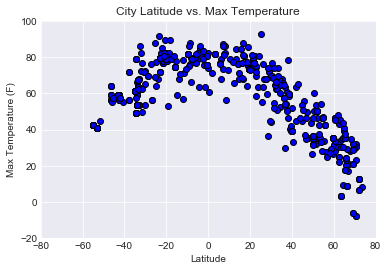

In [22]:
import seaborn as sns
sns.set_style('darkgrid')

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.ylim(-20,100)
plt.xlim (-80,80)

lat = city_pd1["Latitude"]
max_temp = city_pd1["Temperature"]

plt.scatter(lat, max_temp, marker="o", facecolors="blue", edgecolors="black")

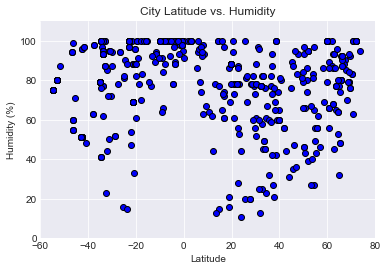

In [25]:
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.ylim(0,110)
plt.xlim (-60,80)

lat = city_pd1["Latitude"]
humidity = city_pd1["Humidity"]

plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black")

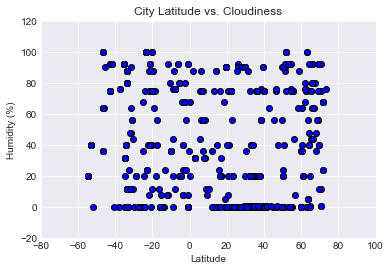

In [24]:
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.ylim(-20,120)
plt.xlim (-80,100)

lat = city_pd1["Latitude"]
cloud = city_pd1["Cloudiness"]

plt.scatter(lat, cloud, marker="o", facecolors="blue", edgecolors="black")

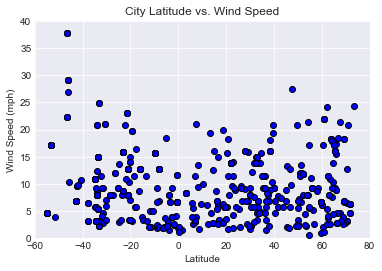

In [17]:
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.ylim(0,40)
plt.xlim (-60,80)

lat = city_pd1["Latitude"]
wind_speed = city_pd1["Wind Speed"]

plt.scatter(lat, wind_speed, marker="o", facecolors="blue", edgecolors="black")